In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as m
from ansys.mapdl.core import launch_mapdl, launcher, Mapdl
import numpy as np

In [2]:
ip = 'xx.3.127.xxx'
mapdl = Mapdl(ip=ip, port=8800, request_instance=True)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


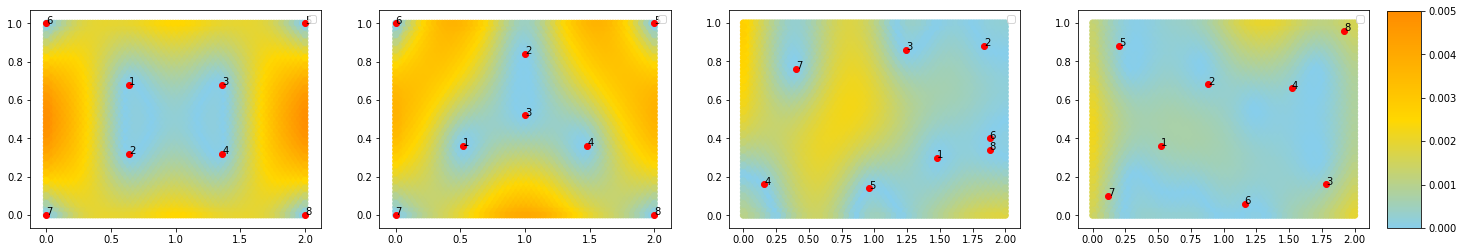

In [3]:
filenames = ['./input_nondeform_2mm_sym1.inp',
             './input_nondeform_2mm_sym2.inp',
             './Baseline_results/input_nondeform_2mm_baseline_1.inp',
             './PPO_logs/Ansys_assembly/nondeformed_inputs_nofix_metal/input_nondeform_2mm.inp']
selected_positions = [[368,377,800,809,2552,2553,2578,2628],
                      [304,580,588,880,2552,2553,2578,2628],
                      [5354,1083, 4874,93,4417,1119,222,6081],
                      [304,512,5878,5400,99,4788,2887,1129]]
colors = ["skyblue","gold","darkorange"]
cmap1 = m.colors.LinearSegmentedColormap.from_list("mycmap", colors)
fig, axes = plt.subplots(1, 4, figsize=(24,4))
# norm = m.colors.Normalize(vmin=0, vmax=0.03)
bottom_displacement_list = []

for i in range(len(filenames)):
    mapdl.clear()
    input_filename = filenames[i] 
    #print(input_filename)
    mapdl.input(input_filename)
    result = mapdl.result 
    all_nodes = mapdl.mesh.nodes
    bottom_index = np.where(mapdl.mesh.nodes[:,1] == 0)[0]
    bottom_surface_nodes = mapdl.mesh.nodes[bottom_index]
    _, displacement =  result.nodal_displacement(0, in_nodal_coord_sys = True)
    bottom_displacement = displacement[bottom_index]
    

    bottom_displacement_norm = np.linalg.norm(bottom_displacement, axis = 1)
    img = axes[i].scatter(bottom_surface_nodes[:,0], 
                    bottom_surface_nodes[:,2], 
                    c = bottom_displacement_norm, 
                    cmap = cmap1, vmin=0, vmax=0.005)
    
    bottom_displacement_list.append(bottom_displacement_norm)
    
    # plt.scatter(all_nodes[selected_positions[:3],0], all_nodes[selected_positions[:3],2])
    for j in range(len(selected_positions[i])):
        axes[i].scatter(all_nodes[selected_positions[i][j]-1,0], 
                        all_nodes[selected_positions[i][j]-1,2], c = 'r')
        axes[i].annotate(str(j+1), (all_nodes[selected_positions[i][j]-1,0], 
                                    all_nodes[selected_positions[i][j]-1,2]))
    axes[i].legend()

cb_ax = fig.add_axes([.91,.124,.02,.754])
fig.colorbar(img, cax=cb_ax)

# plt.savefig('./result/nondeform_viz_new.png')
    

In [4]:
filenames = ['./input_nondeform_2mm_sym1.inp',
             './input_nondeform_2mm_sym2.inp',
             './Baseline_results/input_nondeform_2mm_baseline_1.inp',
             './Baseline_results/input_nondeform_2mm_baseline_2.inp',
             './Baseline_results/input_nondeform_2mm_baseline_3.inp',
             './Baseline_results/input_nondeform_2mm_baseline_4.inp',
             './Baseline_results/input_nondeform_2mm_baseline_5.inp',
             './PPO_logs/Ansys_assembly/nondeformed_inputs_nofix_metal/input_nondeform_2mm.inp']

bottom_displacement_list = []

for i in range(len(filenames)):
    mapdl.clear()
    input_filename = filenames[i] 
    #print(input_filename)
    mapdl.input(input_filename)
    result = mapdl.result 
    all_nodes = mapdl.mesh.nodes
    bottom_index = np.where(mapdl.mesh.nodes[:,1] == 0)[0]
    bottom_surface_nodes = mapdl.mesh.nodes[bottom_index]
    _, displacement =  result.nodal_displacement(0, in_nodal_coord_sys = True)
    bottom_displacement = displacement[bottom_index]
    

    bottom_displacement_norm = np.linalg.norm(bottom_displacement, axis = 1)
    
    bottom_displacement_list.append(bottom_displacement_norm)

(array([-0.001,  0.   ,  0.001,  0.002,  0.003,  0.004,  0.005]),
 <a list of 7 Text yticklabel objects>)

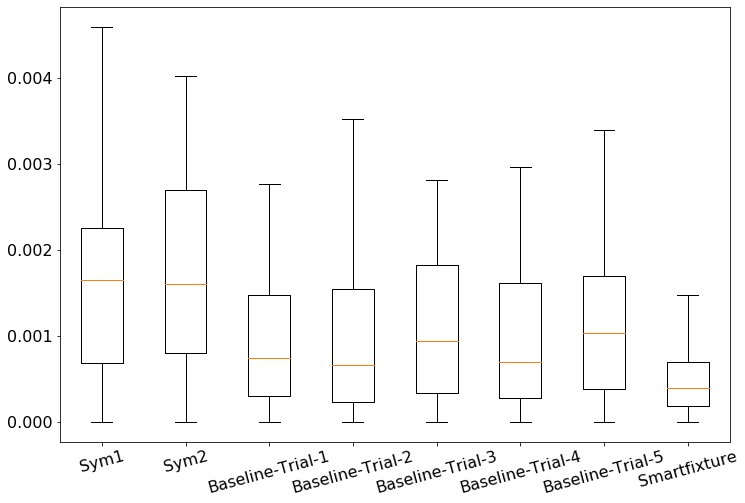

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(12,8))
x_bars = ('Sym1', 'Sym2', 'Baseline-Trial-1', 'Baseline-Trial-2', 'Baseline-Trial-3', 
          'Baseline-Trial-4','Baseline-Trial-5','Smartfixture')
x_pos = np.arange(len(x_bars))
axes.boxplot(bottom_displacement_list, showfliers=False)
plt.xticks(x_pos+1, x_bars, fontsize = 16, rotation=15)
plt.yticks(fontsize = 16)
# plt.savefig('./result/boxplot_viz.png')